In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

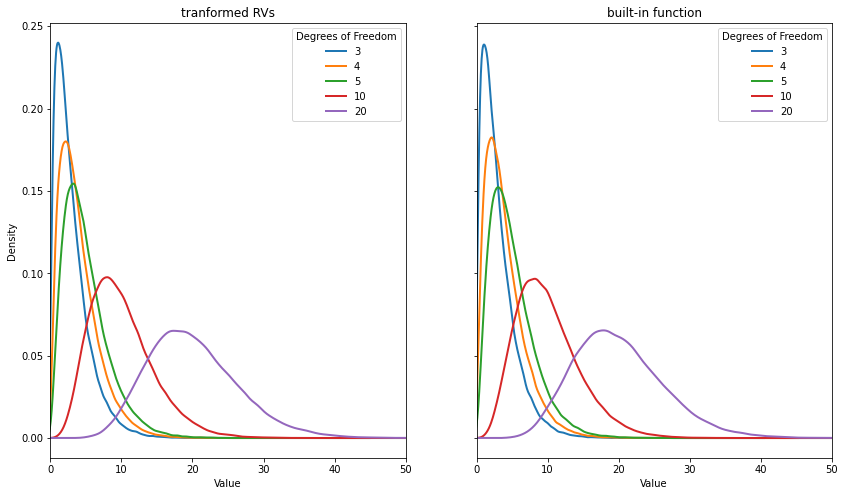

In [7]:
# show that chi^2 random variables can be generated by summing up independent squared standard normal random variables
N = 10**5
dofs = [3, 4, 5, 10, 20]

ncols = len(dofs)

transformedChi2Samples = pd.DataFrame()
generatedChi2Samples = pd.DataFrame()
fig,axs =  plt.subplots(1,2, figsize=(14,8), sharey = True)
for dof in dofs:
#     compute chi^2 distr through transformation of standard normal RV's
    Normsample = np.random.normal(size=(N, dof))
    transformedChi2Samples[str(dof)] = np.sum(np.power(Normsample,2), axis = 1)
 
#     compute chi^2 distr using built in function
    generatedChi2Samples[str(dof)] = np.random.chisquare(size=N, df = dof)

    
transformedChi2Samples.plot.density(xlim=(0,50),linewidth=2, ax = axs[0])
generatedChi2Samples.plot.density(xlim=(0,50),linewidth=2, ax = axs[1])
# Plot formatting
plt.setp(axs, xlabel='Value')
plt.setp(axs, ylabel='Density')
axs[0].set_title('tranformed RVs')
axs[1].set_title('built-in function')
axs[0].legend(title = 'Degrees of Freedom')
axs[1].legend(title = 'Degrees of Freedom')

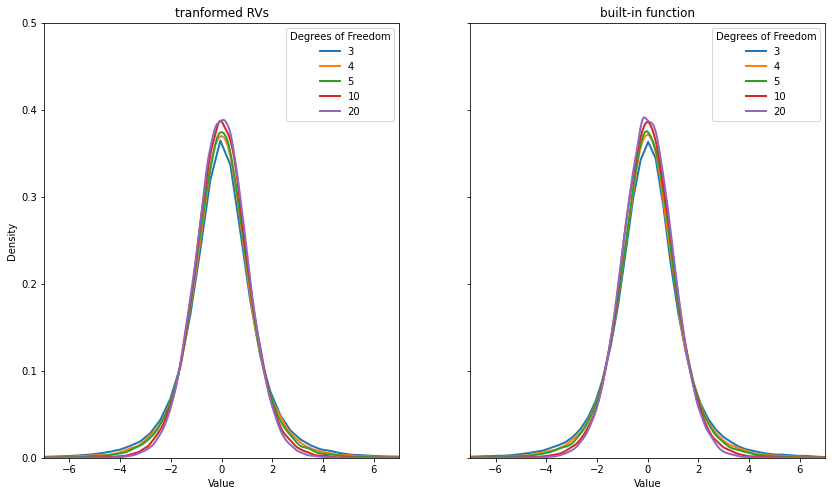

In [8]:
# show that a student-t random variable can be constructed by the ratio of a standard normal divided by the square 
# root of a chi^2 rv  divded by its degrees of freedom

fig,axs =  plt.subplots(1,2, figsize=(14,8), sharey = True)
transformedTSamples = pd.DataFrame()
generatedTSamples = pd.DataFrame()

for dof in dofs:
#     compute student's t distr through transformation of standard normal RV's
    transformedTSamples[str(dof)] = np.random.normal(size=N) / np.sqrt(np.random.chisquare(size=N, df = dof)/dof)
    
#     compute student's t distr using built in function
    generatedTSamples[str(dof)] = np.random.standard_t(size=N, df = dof)
    
transformedTSamples.plot.density(xlim=(0,50),linewidth=2, ax = axs[0])
generatedTSamples.plot.density(xlim=(0,50),linewidth=2, ax = axs[1]) 
# Plot formatting
plt.setp(axs, xlabel='Value')
plt.setp(axs, ylabel='Density')
axs[0].set_title('tranformed RVs')
axs[1].set_title('built-in function')
for i in range(2):
    axs[i].legend(title = 'Degrees of Freedom')
    axs[i].set(xlim=(-7,7),ylim=(0,0.5))

In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import scipy.stats as stats
import math

In [30]:
@interact
def Interactive(distr = ['normal','laplace','student'],scale=(0.1,10,0.1),df=(1,10,1)):
    mu = 0
    x = np.linspace(-10, 10, 100)
    plt.xlim(-10, 10)
    plt.ylim(0, 2)
    if distr=='normal':
        plt.plot(x, stats.norm.pdf(x, mu, math.sqrt(scale)))
        plt.show()
    if distr=='laplace':
        plt.plot(x, stats.laplace.pdf(x,0,scale))
        plt.show()
    if distr=='student':
        plt.plot(x, stats.t.pdf(x,df,0,scale))
        plt.show()

interactive(children=(Dropdown(description='distr', options=('normal', 'laplace', 'student'), value='normal'),…